In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import (Basic_info_func, Remove_outliers_with_lof, Select_k_best_features, Adjusted_r2_score,
                       Evaluation_results)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.activations import tanh
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import xgboost as xgb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


Path = /OneDrive/Desktop/MS-AAi/Course_500_Probability/Project_AAI500-A1 

In [2]:
#loading dataset 
train_df = pd.read_csv('./Data/train_df.csv')
test_df = pd.read_csv('./Data/test_df.csv')

X_train = train_df.drop('critical_temp', axis = 1)
y_train = train_df['critical_temp']

X_test = test_df.drop('critical_temp', axis = 1)
y_test = test_df['critical_temp']

In [3]:
new_train_X, new_train_y  = Remove_outliers_with_lof(X_train, y_train, contamination = 0.1)

Shape before outlier removal:
(18073, 82)

Shape after outlier removal:
(16265, 82)


### Features Selection

In the data analysis part we observed that our entire data has many highly colinear features that causes multi colinearity. 


In [4]:
X_train_filtered, scores = Select_k_best_features(new_train_X, new_train_y, k=30, score_func=mutual_info_regression)

print(scores)
selected_columns = X_train_filtered.columns

X_test_filtered = X_test[selected_columns]

scaler = StandardScaler()
scaled_train_k_best = scaler.fit_transform(X_train_filtered)
scaled_test_k_best = scaler.transform(X_test_filtered)

gmean_Density                0.954555
std_fie                      0.941289
std_ThermalConductivity      0.930874
entropy_atomic_mass          0.924807
entropy_atomic_radius        0.919293
range_fie                    0.916954
range_ElectronAffinity       0.909597
entropy_Density              0.906458
entropy_ElectronAffinity     0.896139
range_Density                0.894329
entropy_FusionHeat           0.887818
std_ElectronAffinity         0.886378
wtd_gmean_Valence            0.883275
wtd_mean_Valence             0.880608
gmean_FusionHeat             0.880099
mean_ThermalConductivity     0.869937
std_atomic_radius            0.850826
wtd_gmean_Density            0.848189
gmean_ElectronAffinity       0.848088
range_atomic_mass            0.846001
gmean_ThermalConductivity    0.844174
entropy_Valence              0.835846
mean_FusionHeat              0.835492
range_atomic_radius          0.834848
wtd_gmean_FusionHeat         0.827936
entropy_fie                  0.824244
mean_Electro

### Simple Linear regression

Linear Regression Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 20.03004
Training MAE: 15.43701
Training R2 score: 0.65978
Training Adjusted R2 score: 0.65915

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 20.83421
Testing MAE: 16.18431
Testing R2 score: 0.62865
Testing Adjusted R2 score: 0.62512


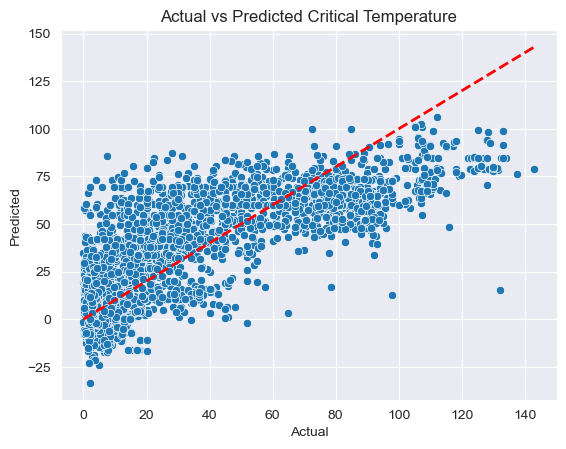

In [5]:
# Step 1: Initialize the linear regression model
simple_linear_regression = LinearRegression()

# Step 2: Fit the model on the scaled training data
simple_linear_regression.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
train_preds = simple_linear_regression.predict(scaled_train_k_best)

# Testing results
print('Linear Regression Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, train_preds, objective = 'train', num_features  = num_features)
train_metrics

# # Testing Results
test_preds = simple_linear_regression.predict(scaled_test_k_best)
test_metrics = Evaluation_results(y_test, test_preds, objective = 'test', num_features  = num_features)
test_metrics


sns.scatterplot(x= y_test, y = test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

### Random Forest

Random Forest Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 14.30270
Training MAE: 9.50299
Training R2 score: 0.82653
Training Adjusted R2 score: 0.82621
None
Random Forest Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 15.56559
Testing MAE: 10.51397
Testing R2 score: 0.79272
Testing Adjusted R2 score: 0.79075
None


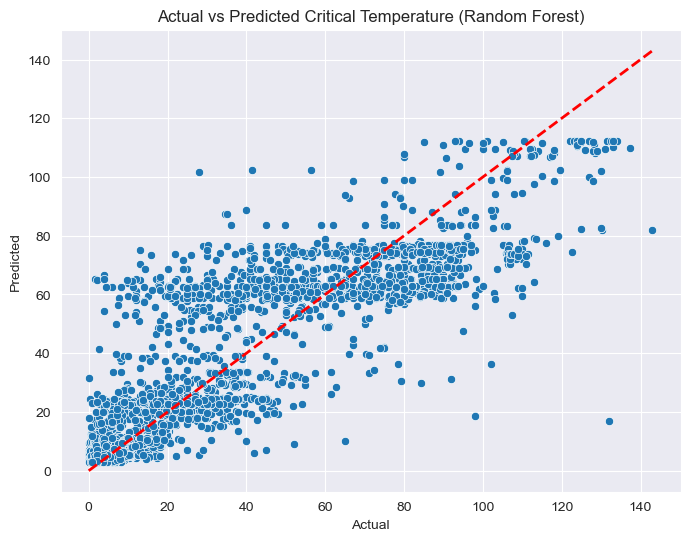

In [7]:
# Step 1: Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, 
                                 max_depth=6,
                                 random_state=42)

# Step 2: Fit the model on the scaled training data
rf_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
rf_train_preds = rf_model.predict(scaled_train_k_best)

# Training results
print('Random Forest Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, rf_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
rf_test_preds = rf_model.predict(scaled_test_k_best)

# Testing results
print('Random Forest Results on Test Set')
test_metrics = Evaluation_results(y_test, rf_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Random Forest)')
plt.show()


### Gradient Boosting

Gradient Boosting Machine Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 5.56878
Training MAE: 3.26350
Training R2 score: 0.97370
Training Adjusted R2 score: 0.97365
None
Gradient Boosting Machine Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 11.54356
Testing MAE: 6.54908
Testing R2 score: 0.88600
Testing Adjusted R2 score: 0.88492
None


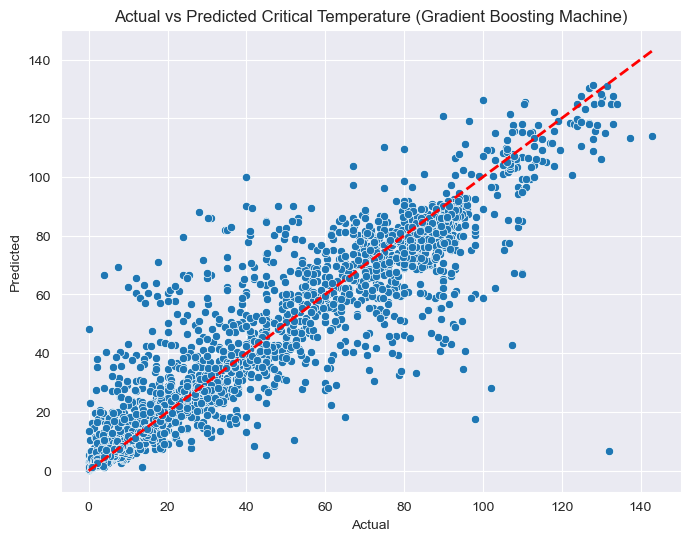

In [8]:
# Step 1: Initialize the GBM Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=500,
                                      learning_rate=0.01,
                                      max_depth=10,
                                      random_state=42)

# Step 2: Fit the model on the scaled training data
gbm_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
gbm_train_preds = gbm_model.predict(scaled_train_k_best)

# Training results
print('Gradient Boosting Machine Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, gbm_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
gbm_test_preds = gbm_model.predict(scaled_test_k_best)

# Testing results
print('Gradient Boosting Machine Results on Test Set')
test_metrics = Evaluation_results(y_test, gbm_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbm_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Gradient Boosting Machine)')
plt.show()


### XGBoost

XGBoost Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 5.23113
Training MAE: 2.93573
Training R2 score: 0.97679
Training Adjusted R2 score: 0.97675

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 11.38377
Testing MAE: 6.39316
Testing R2 score: 0.88913
Testing Adjusted R2 score: 0.88808


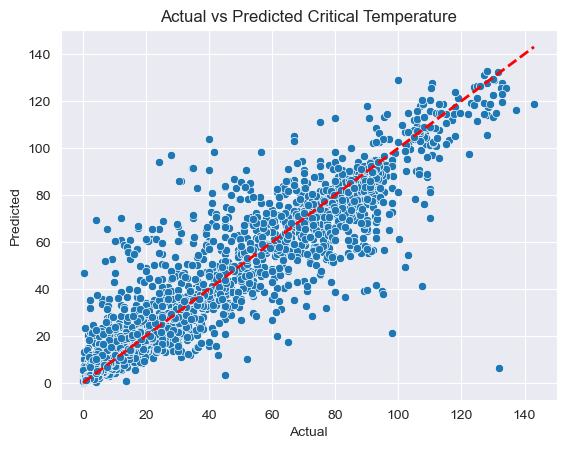

In [9]:
# Step 1: Initialize the XGBoost Regressor model
# using RandomSearchCV Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=10,
                         
                             reg_lambda = 0.6,
                             random_state=42)

# Step 2: Fit the model on the scaled training data
xgb_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
xgb_train_preds = xgb_model.predict(scaled_train_k_best)

# Training results
print('XGBoost Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, xgb_train_preds, objective = 'train', num_features  = num_features)
train_metrics

# Predict on the testing set
xgb_test_preds = xgb_model.predict(scaled_test_k_best)

# Testing results
test_metrics = Evaluation_results(y_test, xgb_test_preds, objective = 'test', num_features  = num_features)
test_metrics

# plotting the results
sns.scatterplot(x= y_test, y = xgb_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()